# Melbourne Building Permits Analysis
## Project Overview

This project analyzes Melbourne building permits to uncover trends in construction activity, estimated costs, permit durations, and geographic patterns across suburbs.

### Skills demonstrated:

Python data manipulation with pandas and numpy

Data visualization with **matplotlib**, **seaborn**, and **plotly**

Geospatial analysis with **geopandas** and **folium**

Machine learning with **scikit-learn** (clustering & forecasting)

Portfolio-ready project design for GitHub

In [169]:
#Installs
!pip install pandas matplotlib seaborn geopandas folium plotly numpy scikit-learn

In [170]:
# 2. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import re

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from IPython.display import display

## Data Loading

### Insights:

CSV contains building permit records with issue_date, completed_by_date, estimated_cost_of_works, address, and desc_of_works.

GeoJSON provides suburb boundaries for geospatial analysis.

In [171]:
# Import from VIC govt repository
url = 'https://data.melbourne.vic.gov.au/api/v2/catalog/datasets/building-permits/exports/csv?delimiter=%2C'

# Load dataset
df = pd.read_csv(url)

# Quick check
from IPython.display import display

display(df.head(10))

# Path to your GeoJSON file
geojson_path = r"C:\Users\mirangaa\Downloads\suburb-2-vic.geojson"

# Load GeoJSON into a GeoDataFrame
geo = gpd.read_file(geojson_path)

# Preview the first few rows
geo.head()


council_ref    permit_number  issue_date  \
0  BP-2023-1674/1    7918243707081  2023-10-25   
1     BP-2024-760    3493370265164  2024-08-14   
2     BP-2024-759  2567443415351/A  2024-06-13   
3     BP-2024-759    2567443415351  2024-04-11   
4     BP-2024-758    5350775664490  2024-05-13   
5     BP-2024-758    5350775664490  2024-09-20   
6     BP-2024-758    5350775664490  2024-05-13   
7     BP-2024-757    5028060001508  2024-04-14   
8     BP-2024-757    5028060001508  2024-04-14   
9     BP-2024-756    2517006888776  2024-05-03   

                                             address  \
0  Level 9, 124 Exhibition Street, MELBOURNE VIC ...   
1  Ground & Level 1-2, 150 Jolimont Road, EAST ME...   
2              180 St Kilda Road, SOUTHBANK VIC 3006   
3  NGV International, 130-200 St Kilda Road, SOUT...   
4  Level 1, 459 Little Collins Street, MELBOURNE ...   
5  Level 1, 459 Little Collins Street, MELBOURNE ...   
6  457-469 Little Collins Street, MELBOURNE VIC 3000   
7   Level 14, 376 Collins Street, MELBOURNE VIC 3000   
8         376-390 Collins Street, MELBOURNE VIC 3000   
9   298-336 Victoria Parade, EAST MELBOURNE VIC 3002   

                                       desc_of_works  estimated_cost_of_works  \
0             Stage 2 - Meeting Room and Lounge Area                   935000   
1  Ground floor - Construction of an internal fit...                  1156250   
2            NGV Ground Floor Bathroom Refurbishment                   590000   
3            NGV Ground Floor Bathroom Refurbishment                   590000   
4  Stage One - To Completion of Demolition Works ...                  1260380   
5  Stage One - To Completion of Demolition Works ...                  1260380   
6  Stage One - To Completion of Demolition Works ...                  1260380   
7         Level 14, 100 Queen Street - Office fitout                  2629285   
8         Level 14, 100 Queen Street - Office fitout                  2629285   
9  Level 2 - Alterations to Medication Room at ex...                    34980   

   rbs_number commence_by_date completed_by_date  \
0         NaN       2024-10-25        2026-09-27   
1         NaN       2025-05-09        2027-05-09   
2         NaN       2025-04-11        2027-04-11   
3         NaN       2025-04-11        2027-04-11   
4  BS-U 42327       2025-05-13        2027-05-13   
5  BS-U 42327       2025-05-13        2027-05-13   
6  BS-U 42327       2025-05-13        2027-05-13   
7   BSU 42518       2025-04-12        2027-04-12   
8   BSU 42518       2025-04-12        2027-04-12   
9  BS-U 23655       2025-05-03        2027-05-03   

           permit_certificate_type  
0                  Building Permit  
1  Certificate of Final Inspection  
2  Certificate of Final Inspection  
3                  Building Permit  
4                  Building Permit  
5  Certificate of Final Inspection  
6                  Building Permit  
7                  Building Permit  
8                  Building Permit  
9                  Building Permit

id lc_ply_pid  dt_create  \
0  ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1       6670 2011-08-31   
1  ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2       6671 2011-08-31   
2  ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3       6672 2011-08-31   
3  ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4       6673 2011-08-31   
4  ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5       6674 2011-08-31   

  dt_retire  loc_pid vic_locali vic_loca_1 vic_loca_2 vic_loca_3 vic_loca_4  \
0      None  VIC2615 2012-04-27       None  UNDERBOOL       None       None   
1      None  VIC1986 2012-04-27       None     NURRAN       None       None   
2      None  VIC2862 2012-04-27       None   WOORNDOO       None       None   
3      None   VIC734 2017-08-09       None   DEPTFORD       None       None   
4      None  VIC2900 2012-04-27       None      YANAC       None       None   

  vic_loca_5 vic_loca_6 vic_loca_7  \
0          G       None          2   
1          G       None          2   
2          G       None          2   
3          G       None          2   
4          G       None          2   

                                            geometry  
0  POLYGON ((141.74552 -35.07229, 141.74917 -35.0...  
1  POLYGON ((148.66877 -37.39571, 148.66609 -37.4...  
2  POLYGON ((142.92288 -37.97886, 142.77155 -37.9...  
3  POLYGON ((147.82336 -37.66001, 147.72499 -37.6...  
4  POLYGON ((141.27978 -35.99859, 141.29501 -35.9...

In [172]:
# The address contains the suburb, state and post code all in one cell. Split this into 3 seperate columns and copy to a new data frame

# --- 1. Extract postcode ---
df['postcode'] = df['address'].str[-4:]

# --- 2. Extract suburb + state ---
# This takes the text between the last comma and the postcode
df['suburb_state'] = df['address'].str.extract(r',\s*([^,]+)\s\d{4}$')

# --- 3. Split suburb_state into suburb_name and state ---
df[['suburb_name', 'state']] = df['suburb_state'].str.rsplit(' ', n=1, expand=True)

# --- 4. Create a new DataFrame with key columns ---
df2 = df[['permit_number', 'address', 'suburb_name', 'state', 'postcode', 
                      'desc_of_works', 'estimated_cost_of_works', 
                      'issue_date', 'commence_by_date', 'completed_by_date', 
                      'permit_certificate_type']].copy()

# Optional: convert estimated cost to billions for readability
df2['estimated_cost_billion'] = (df2['estimated_cost_of_works'] / 1_000_000_000).round(2)


## Data Cleaning

### Steps taken:

Standardized column names and text fields

1. Converted date fields to datetime objects

1. Extracted suburb from the last 4 characters of the address

1. Created derived columns:

   * issue_year, issue_month

   * duration_days (completion - issue)

   * completed flag

1. Removed negative estimated costs

1. Log-transformed estimated_cost_of_works for skewed distributions

#### Insights:

* Data contained missing dates and descriptions, which were handled to ensure accurate analysis.

* Suburb extraction enables geospatial aggregation.

In [173]:
df2.columns = df2.columns.str.lower().str.replace(' ', '_')

# Convert date columns
df2['issue_date'] = pd.to_datetime(df2['issue_date'], errors='coerce')
df2['commence_by_date'] = pd.to_datetime(df2['commence_by_date'], errors='coerce')
df2['completed_by_date'] = pd.to_datetime(df2['completed_by_date'], errors='coerce')

# Handle missing values
df2 = df2.dropna(subset=['issue_date', 'desc_of_works'])
df2['desc_of_works'] = df2['desc_of_works'].fillna('Unknown')

# Strip and standardize text fields
df2['desc_of_works'] = df2['desc_of_works'].str.strip().str.title()
df2['permit_certificate_type'] = df2['permit_certificate_type'].str.strip().str.title()
df2['address'] = df2['address'].str.strip()

# Extract suburb from last 4 characters of address
df2['suburb'] = df2['address'].str[-4:].str.strip().str.upper()

# Feature engineering
df2['issue_year'] = df2['issue_date'].dt.year
df2['issue_month'] = df2['issue_date'].dt.month
df2['duration_days'] = (df2['completed_by_date'] - df2['issue_date']).dt.days
df2['completed'] = df2['completed_by_date'].notna()

# Handle estimated cost
df2 = df2[df2['estimated_cost_of_works'] >= 0]  # remove negative costs
df2['log_estimated_cost'] = np.log1p(df2['estimated_cost_of_works'])


## Exploratory Data Analysis (EDA)
### Permit Trends Over Time

* Line chart showing total permits issued per year.

* Average estimated cost per year.

#### Insights:

* Identify periods of high or low building activity.

* Observe trends in average permit costs over time.

estimated_cost_of_works                     issue_date  \
count             1.788820e+05                         178882   
mean              2.969899e+07  2014-03-11 16:17:54.835925760   
min               0.000000e+00            1983-08-11 00:00:00   
25%               4.816050e+04            2007-10-03 00:00:00   
50%               2.067515e+05            2016-04-29 00:00:00   
75%               1.500000e+06            2020-10-06 00:00:00   
max               7.411276e+09            2027-02-21 00:00:00   
std               1.051134e+08                            NaN   

                    commence_by_date              completed_by_date  \
count                         100211                         102132   
mean   2020-08-24 13:01:52.981608960  2022-03-19 06:47:07.211843584   
min              1947-04-13 00:00:00            1998-03-03 00:00:00   
25%              2018-03-21 00:00:00            2019-11-30 00:00:00   
50%              2020-03-29 00:00:00            2022-01-23 00:00:00   
75%              2023-06-02 00:00:00            2025-04-06 00:00:00   
max              2028-06-20 00:00:00            2106-11-25 00:00:00   
std                              NaN                            NaN   

       estimated_cost_billion     issue_year    issue_month  duration_days  \
count           178882.000000  178882.000000  178882.000000  102132.000000   
mean                 0.029418    2013.671130       6.775919     816.222947   
min                  0.000000    1983.000000       1.000000   -6575.000000   
25%                  0.000000    2007.000000       4.000000     661.000000   
50%                  0.000000    2016.000000       7.000000     998.000000   
75%                  0.000000    2020.000000      10.000000    1095.000000   
max                  7.410000    2027.000000      12.000000   33602.000000   
std                  0.105313       8.104734       3.292169     426.409056   

       log_estimated_cost  
count       178882.000000  
mean            12.515627  
min              0.000000  
25%             10.782315  
50%             12.239278  
75%             14.220976  
max             22.726268  
std              3.633877

desc_of_works  suburb  \
count                                       178882  178882   
unique                                       64103      23   
top     Installation Of Alarm Signalling Equipment    3000   
freq                                           614   84179   

       permit_certificate_type  
count                   178882  
unique                       4  
top            Building Permit  
freq                     95024

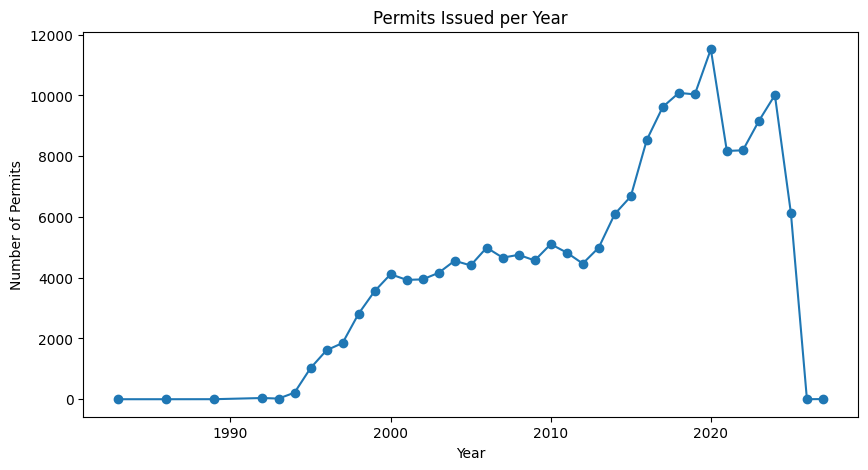

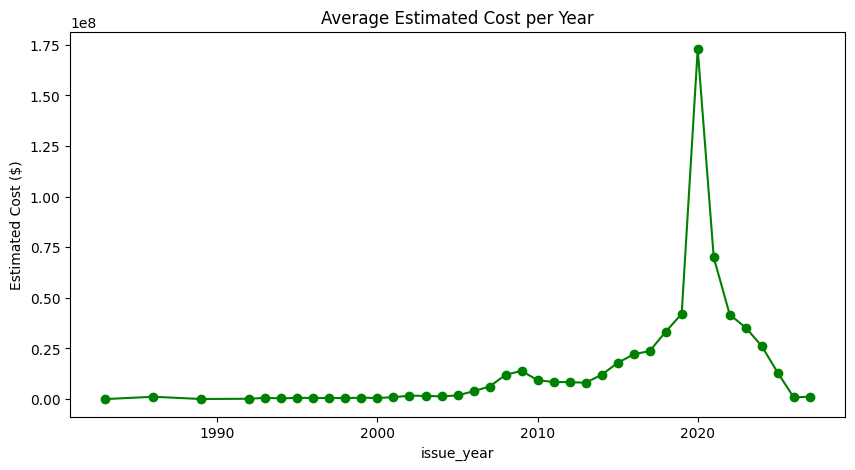

In [174]:
# Overview statistics
display(df2.describe())
display(df2[['desc_of_works', 'suburb', 'permit_certificate_type']].describe())

# Permits over time
permits_per_year = df2.groupby('issue_year').size()
plt.figure(figsize=(10,5))
permits_per_year.plot(marker='o')
plt.title('Permits Issued per Year')
plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.show()

# Average estimated cost per year
avg_cost_per_year = df2.groupby('issue_year')['estimated_cost_of_works'].mean()
plt.figure(figsize=(10,5))
avg_cost_per_year.plot(marker='o', color='green')
plt.title('Average Estimated Cost per Year')
plt.ylabel('Estimated Cost ($)')
plt.show()

### Estimated Cost Analysis

* Histogram and log-transformed histogram of estimated costs.


#### Insights:

* Most permits are low to medium-cost projects.

* Mega-projects exist but are rare and skew the distribution.

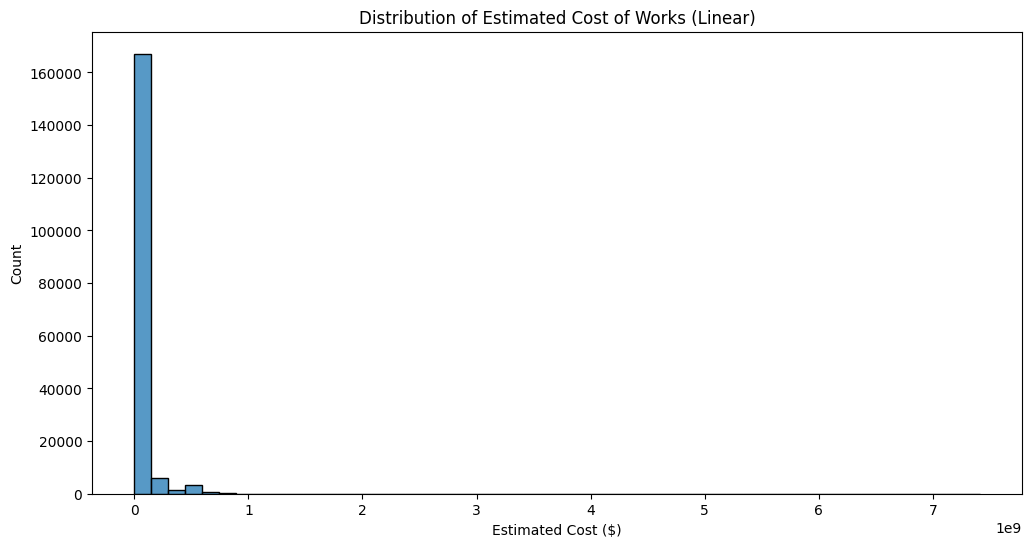

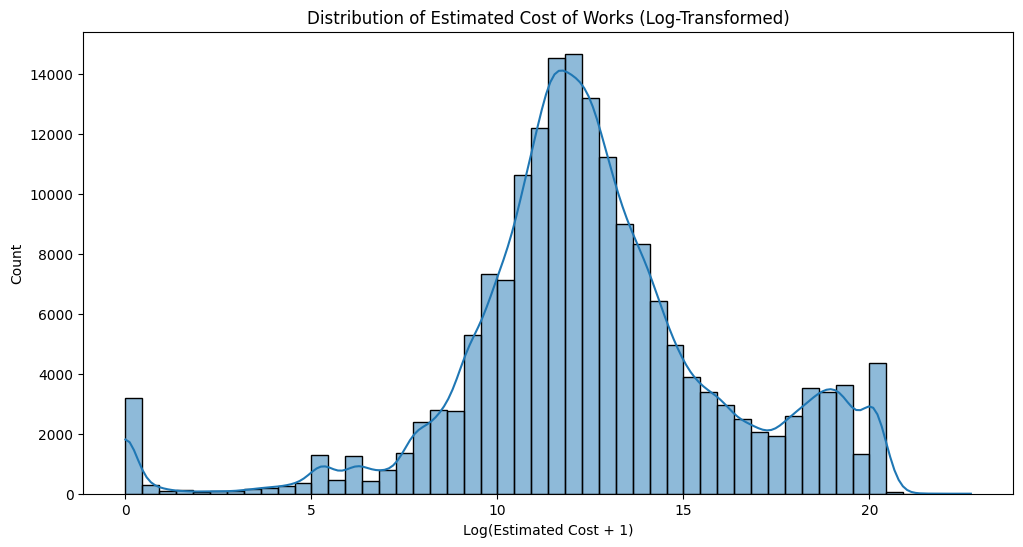

In [175]:
# Distribution of estimated cost (linear and log)
plt.figure(figsize=(12,6))
sns.histplot(df2['estimated_cost_of_works'], bins=50, kde=False)
plt.title('Distribution of Estimated Cost of Works (Linear)')
plt.xlabel('Estimated Cost ($)')
plt.show()

df2['log_estimated_cost'] = np.log1p(df2['estimated_cost_of_works'])

plt.figure(figsize=(12,6))
sns.histplot(df2['log_estimated_cost'], bins=50, kde=True)
plt.title('Distribution of Estimated Cost of Works (Log-Transformed)')
plt.xlabel('Log(Estimated Cost + 1)')
plt.show()


### Suburb Analysis

* Top 10 suburbs by number of permits

Highlights areas with the most construction activity

C:\Users\mirangaa\AppData\Local\Temp\ipykernel_27148\557036903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette='viridis')


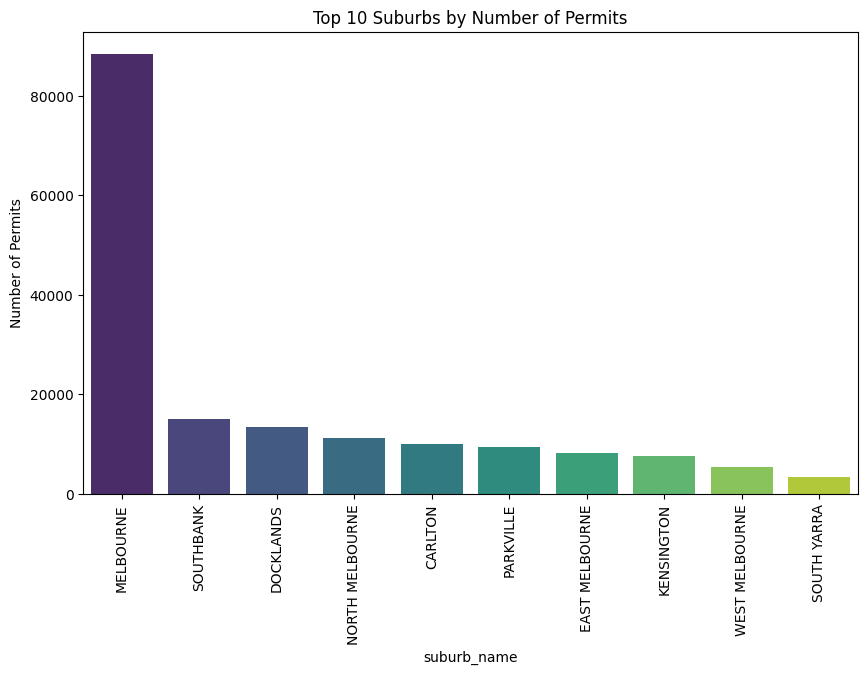

In [176]:
# Top suburbs by number of permits
top_suburbs = df2['suburb_name'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette='viridis')
plt.title('Top 10 Suburbs by Number of Permits')
plt.ylabel('Number of Permits')
plt.xticks(rotation=90)
plt.show()

### Geospatial Analysis
#### Choropleth Map

* Visualizes total estimated cost per suburb

#### Insights:

* Suburbs with high construction activity and/or high-cost projects are easily identified.

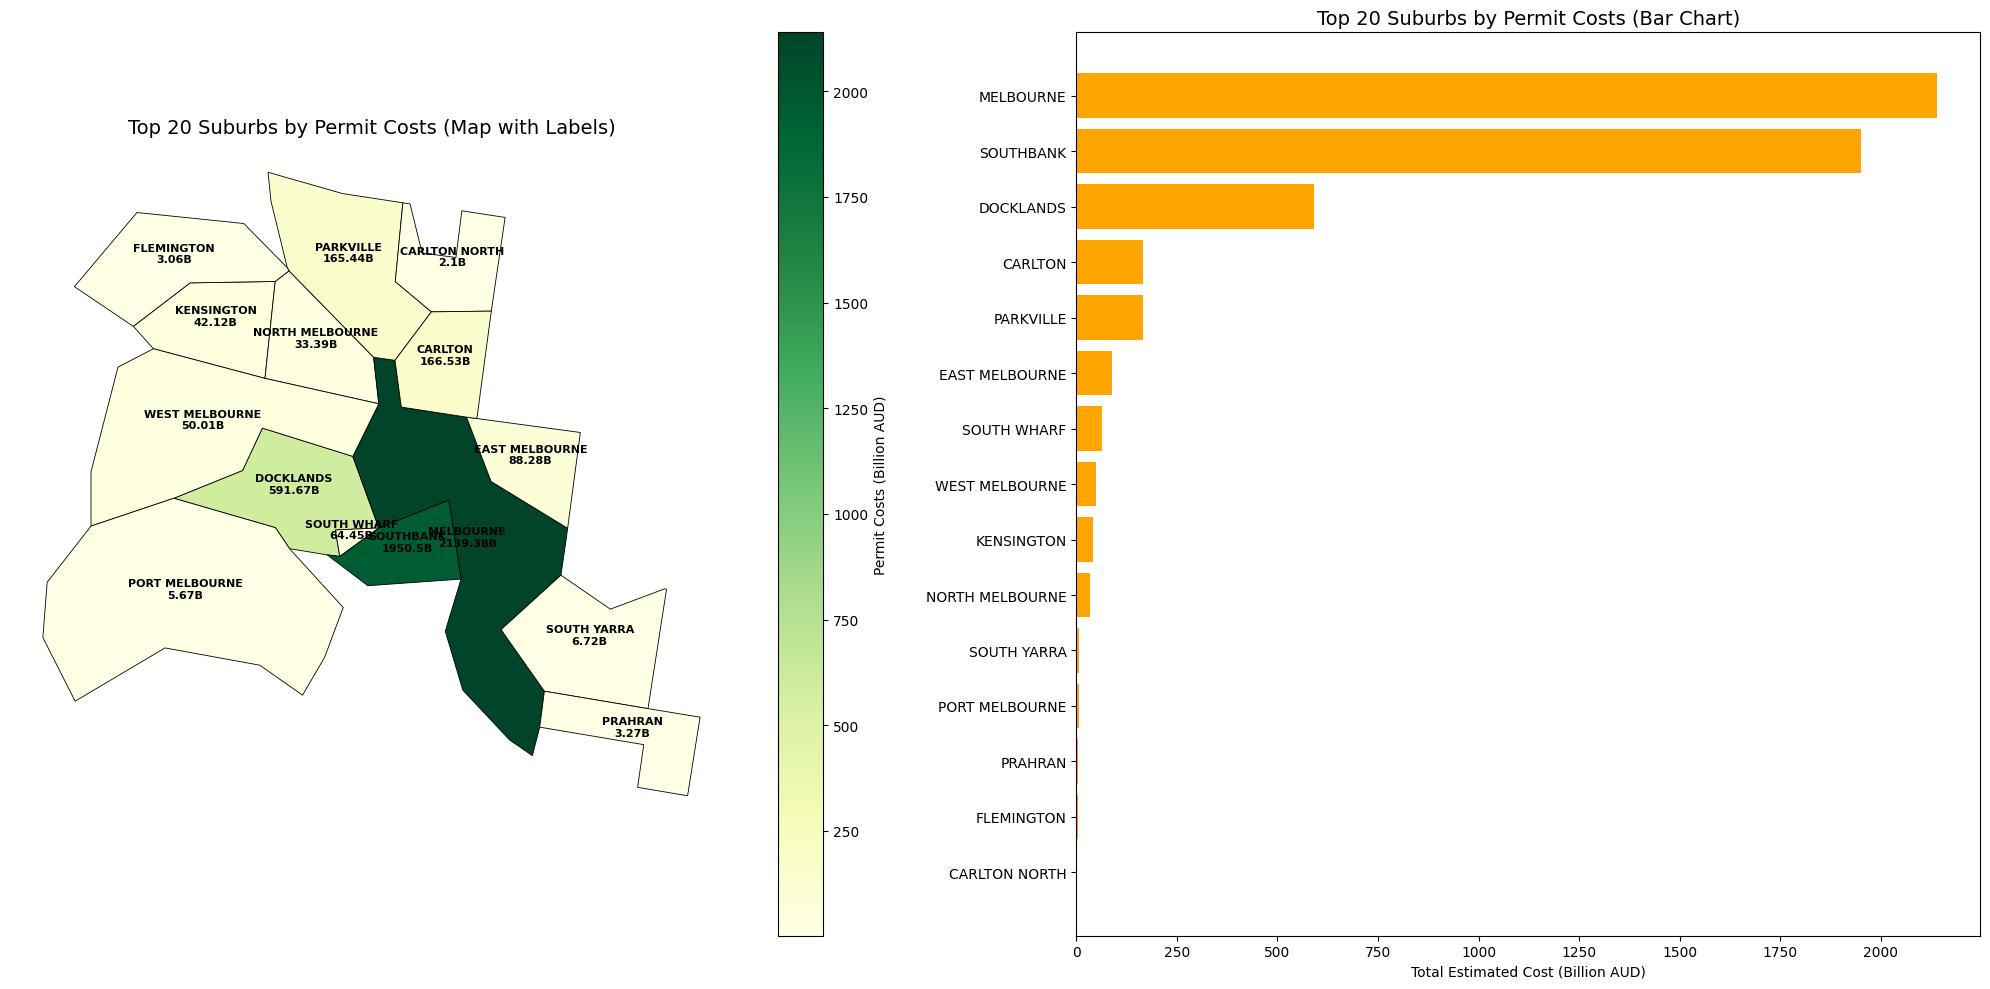

In [177]:

# --- 2. Filter out invalid costs ---
df2 = df2[df2['estimated_cost_of_works'] > 0]

# --- 3. Aggregate total estimated cost per suburb ---
permits_by_suburb = (
    df2.groupby('suburb_name')['estimated_cost_of_works']
      .sum()
      .reset_index()
)

# --- 4. Convert to billions of AUD ---
permits_by_suburb['estimated_cost_billion'] = (permits_by_suburb['estimated_cost_of_works'] / 1_000_000_000).round(2)

# --- 5. Get top 20 suburbs ---
top20_suburbs = permits_by_suburb.nlargest(20, 'estimated_cost_billion').reset_index(drop=True)

# --- 6. Merge with GeoJSON ---
geo_top20 = geo.merge(
    top20_suburbs[['suburb_name', 'estimated_cost_billion']],
    left_on='vic_loca_2',
    right_on='suburb_name',
    how='inner'
)

# --- 7. Plot choropleth with labels ---
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Choropleth map
geo_top20.plot(
    column='estimated_cost_billion',
    cmap='YlGn',
    legend=True,
    legend_kwds={'label': "Permit Costs (Billion AUD)", 'orientation': "vertical"},
    edgecolor="black",
    linewidth=0.6,
    ax=axes[0]
)
axes[0].set_title("Top 20 Suburbs by Permit Costs (Map with Labels)", fontsize=14)
axes[0].axis('off')

# Add suburb name + cost labels
for idx, row in geo_top20.iterrows():
    centroid = row['geometry'].centroid
    axes[0].text(
        centroid.x,
        centroid.y,
        f"{row['suburb_name']}\n{row['estimated_cost_billion']}B",
        horizontalalignment='center',
        fontsize=8,
        fontweight='bold',
        color='black'
    )

# Horizontal bar chart
top20_sorted = top20_suburbs.sort_values(by='estimated_cost_billion', ascending=True)
axes[1].barh(
    top20_sorted['suburb_name'],
    top20_sorted['estimated_cost_billion'],
    color="orange"
)
axes[1].set_title("Top 20 Suburbs by Permit Costs (Bar Chart)", fontsize=14)
axes[1].set_xlabel("Total Estimated Cost (Billion AUD)")
axes[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


## Interactive Map (Folium)

Hover over suburbs to see permit cost data.

* Makes the analysis engaging and shareable.

In [178]:
# Convert any datetime columns to strings
for col in geo_merged.columns:
    if pd.api.types.is_datetime64_any_dtype(geo_merged[col]):
        geo_merged[col] = geo_merged[col].astype(str)


In [179]:
m = folium.Map(location=[-37.8136, 144.9631], zoom_start=12, width=600, height=400)   

folium.Choropleth(
    geo_data=geo_merged,
    name='choropleth',
    data=geo_merged,
    columns=['suburb_name', 'estimated_cost_billion'],
    key_on='feature.properties.vic_loca_2',
    fill_color='YlOrBr',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Permit Costs (Billion AUD)'
).add_to(m)

# --- 5. Add tooltips for labels ---
for _, row in geo_top20.iterrows():
    folium.GeoJson(
        row['geometry'],
        style_function=lambda x: {'fillColor': 'transparent', 'color':'black', 'weight':0.5},
        tooltip=f"{row['suburb_name']}\n{row['estimated_cost_billion']}B"
    ).add_to(m)

# --- 6. Layer control ---
folium.LayerControl().add_to(m)
m


## Advanced Analysis
### Top 1% Most Expensive Projects

* Identify and visualize the highest-cost projects.

#### Insights:

* Rare mega-projects dominate total estimated costs.

* Useful for highlighting significant construction activity.

permit_number          permit_certificate_type  \
24637       14734/100111/2                  Building Permit   
137015         2012/0299/6                 Occupancy Permit   
37233          2012/0299/6                  Building Permit   
172554  1227/4051840511026                  Building Permit   
172553  1227/4051840511026                  Building Permit   
...                    ...                              ...   
51774        4553807005456  Certificate Of Final Inspection   
51778        4553807005456  Certificate Of Final Inspection   
176544       4553807005456                  Building Permit   
176545       4553807005456  Certificate Of Final Inspection   
176546       4553807005456  Certificate Of Final Inspection   

                                                  address suburb_name state  \
24637     Level 6, 267 Collins Street, MELBOURNE VIC 3000   MELBOURNE   VIC   
137015               30-50 Elgin Street, CARLTON VIC 3053     CARLTON   VIC   
37233                30-50 Elgin Street, CARLTON VIC 3053     CARLTON   VIC   
172554  Crown Casino Carpark, 25-29 Clarke Street, SOU...   SOUTHBANK   VIC   
172553          27-59 Whiteman Street, SOUTHBANK VIC 3006   SOUTHBANK   VIC   
...                                                   ...         ...   ...   
51774          99-107 Kavanagh Street, SOUTHBANK VIC 3006   SOUTHBANK   VIC   
51778             1-13 Hoff Boulevard, SOUTHBANK VIC 3006   SOUTHBANK   VIC   
176544            1-13 Hoff Boulevard, SOUTHBANK VIC 3006   SOUTHBANK   VIC   
176545        109-119 Kavanagh Street, SOUTHBANK VIC 3006   SOUTHBANK   VIC   
176546            1-13 Hoff Boulevard, SOUTHBANK VIC 3006   SOUTHBANK   VIC   

                                            desc_of_works  \
24637   Additions And Alterations To Tiffany & Co.  Am...   
137015  Stage 6: Fire Services - Living Carlton Stage ...   
37233   Stage 6: Fire Services - Living Carlton Stage ...   
172554  Stage 2: Final Works Including Haig Street Sta...   
172553  Stage 2: Final Works Including Haig Street Sta...   
...                                                   ...   
51774   Stage 7H (Bp41) - Tower T2 Levels 8 And 54 Poo...   
51778   Stage 7H (Bp41) - Tower T2 Levels 8 And 54 Poo...   
176544  Stage 7H (Bp41) - Tower T2 Levels 8 And 54 Poo...   
176545  Stage 7H (Bp41) - Tower T2 Levels 8 And 54 Poo...   
176546  Stage 7H (Bp41) - Tower T2 Levels 8 And 54 Poo...   

        estimated_cost_million  
24637                  7411.28  
137015                 2676.46  
37233                  2676.46  
172554                 1845.16  
172553                 1845.16  
...                        ...  
51774                   553.46  
51778                   553.46  
176544                  553.46  
176545                  553.46  
176546                  553.46  

[1859 rows x 7 columns]

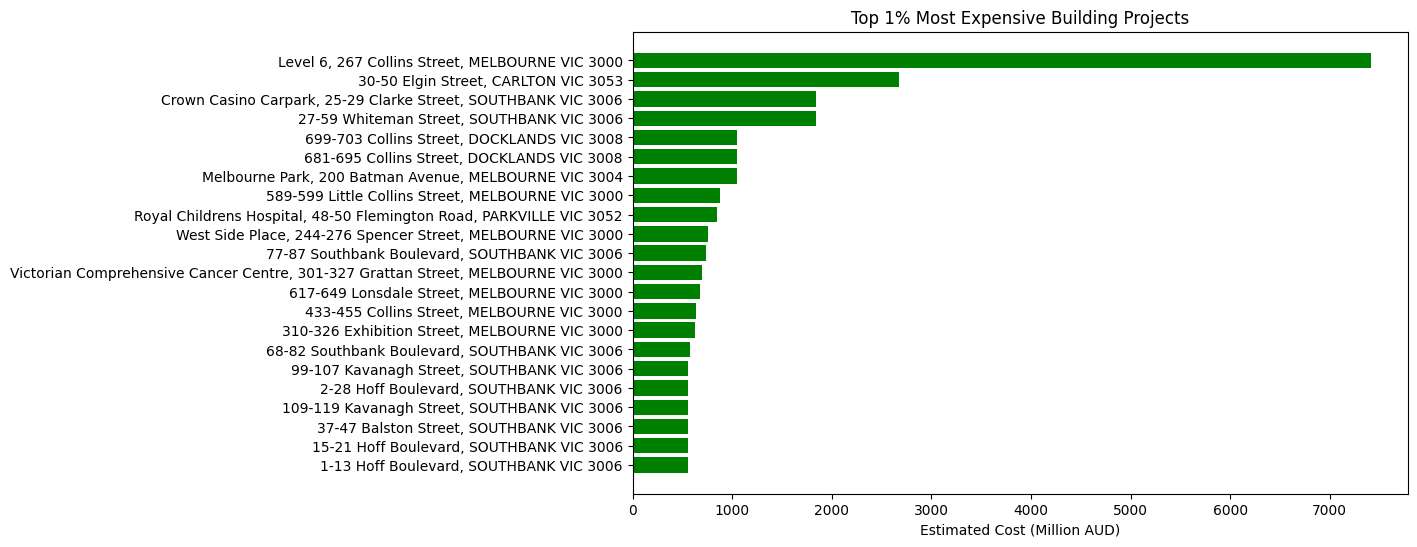

In [180]:
# ---- Top 1% Most Expensive Projects ----
threshold = df2['estimated_cost_of_works'].quantile(0.99)
top_projects = df2[df2['estimated_cost_of_works'] >= threshold].copy()

# Convert cost to millions for readability
top_projects['estimated_cost_million'] = (top_projects['estimated_cost_of_works'] / 1_000_000).round(2)

# Display relevant columns
display(top_projects[['permit_number', 'permit_certificate_type', 
                      'address', 'suburb_name', 'state', 
                      'desc_of_works', 'estimated_cost_million']].sort_values(
                          by='estimated_cost_million', ascending=False))


# Sort descending
top_projects_sorted = top_projects.sort_values('estimated_cost_million', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(top_projects_sorted['address'], top_projects_sorted['estimated_cost_million'], color='green')
plt.xlabel('Estimated Cost (Million AUD)')
plt.title('Top 1% Most Expensive Building Projects')
plt.gca().invert_yaxis()  # ensures the largest cost is at the top
plt.show()


## Clustering Suburbs

### KMeans clustering of suburbs based on:

* Number of permits

* Average estimated cost

#### Insights:

* Suburbs cluster into patterns of high vs low activity and cost.
* Helps stakeholders identify similar development zones.

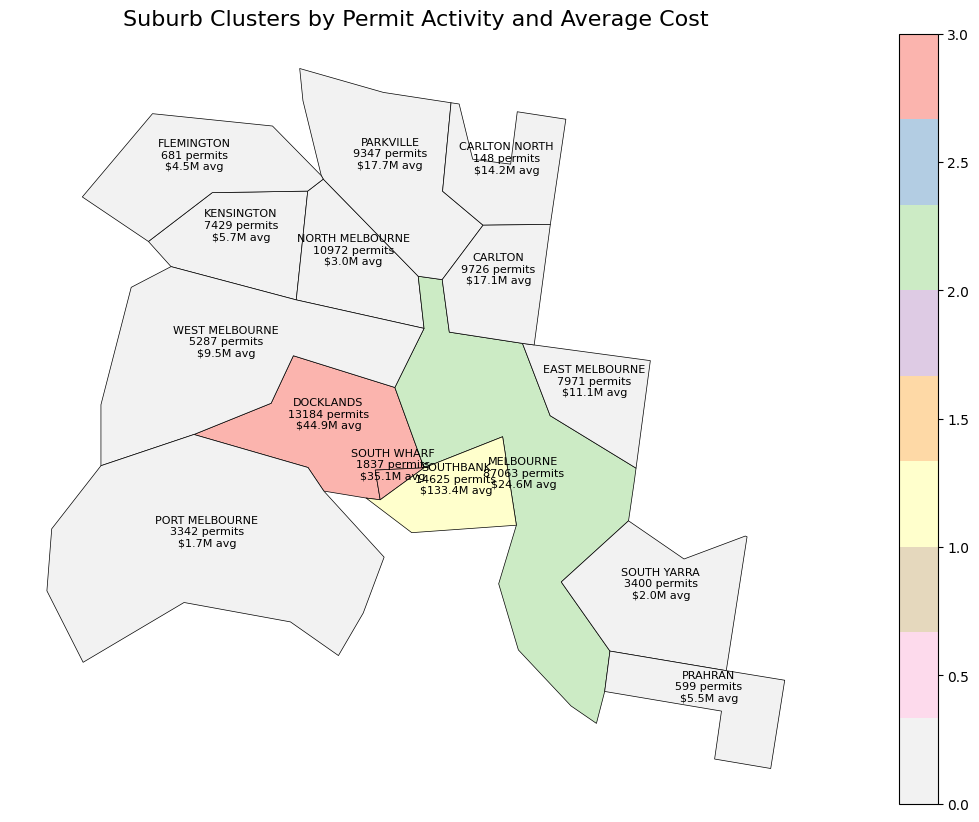

In [181]:
# --- 1. Suburb summary ---
suburb_summary = df2.groupby('suburb_name').agg({
    'address': 'count',  # number of permits
    'estimated_cost_of_works': 'mean'
}).rename(columns={'address': 'num_permits', 'estimated_cost_of_works': 'avg_cost'}).reset_index()

# --- 2. Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(suburb_summary[['num_permits', 'avg_cost']])

# --- 3. KMeans clustering ---
kmeans = KMeans(n_clusters=4, random_state=42)
suburb_summary['cluster'] = kmeans.fit_predict(X_scaled)

# --- 4. Filter GeoJSON to only suburbs in the dataset ---
geo_suburbs = geo[geo['vic_loca_2'].isin(suburb_summary['suburb_name'])].copy()

# --- 5. Merge GeoJSON with cluster data ---
geo_clustered = geo_suburbs.merge(
    suburb_summary,
    left_on='vic_loca_2',  # GeoJSON suburb column
    right_on='suburb_name',
    how='left'
)

# --- 6. Plot ---
fig, ax = plt.subplots(figsize=(20, 10))
geo_clustered.plot(
    column='cluster',
    cmap='Pastel1_r',
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)
ax.set_title('Suburb Clusters by Permit Activity and Average Cost', fontsize=16)
ax.axis('off')

# --- 7. Add data labels ---
for idx, row in geo_clustered.iterrows():
    # Centroid coordinates
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    label = f"{row['vic_loca_2']}\n{row['num_permits']} permits\n${row['avg_cost']/1e6:.1f}M avg"
    ax.annotate(
        text=label,        # <--- text goes here
        xy=(x, y),
        horizontalalignment='center',
        fontsize=8,
        color='black'
    )


plt.show()


## Most Common Words in Descriptions
* Shows the words that are used most commonly to describe the type of work being performed by a given buidling permit

Top 20 most common words in desc_of_works:
to: 81266
of: 58097
level: 57336
stage: 55238
alterations: 50443
and: 47314
fitout: 37611
existing: 33493
office: 33487
building: 30512
works: 29821
internal: 27646
tenancy: 25635
ground: 17027
proposed: 14615
construction: 14062
a: 13890
an: 12480
floor: 12391
levels: 11738

Project type counts:
project_type
Other          125015
Commercial      44552
Residential      9354
Unknown            13
Name: count, dtype: int64


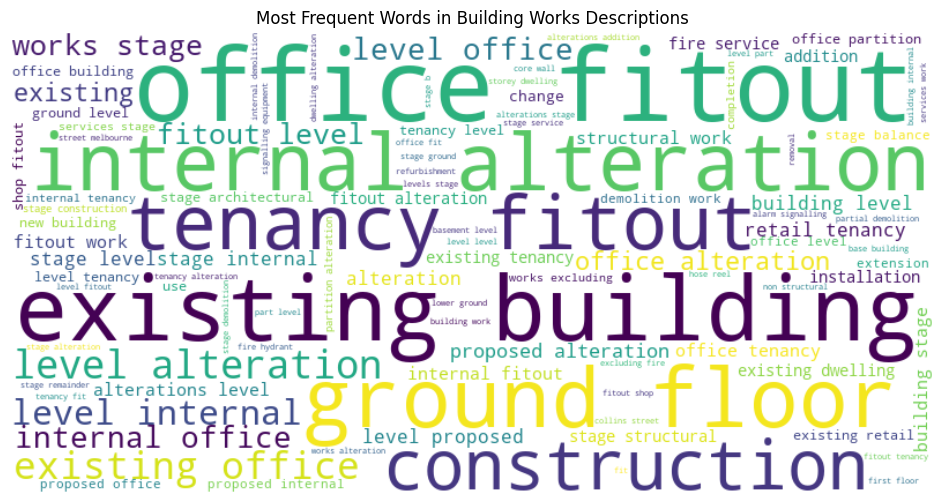

In [182]:
!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import re

# --- 1. Basic text cleaning ---
# Convert to lowercase and remove punctuation/numbers
df['desc_clean'] = df['desc_of_works'].str.lower().replace(r'[^a-z\s]', '', regex=True)

# --- 2. Most common words ---
all_words = ' '.join(df['desc_clean'].dropna()).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)
print("Top 20 most common words in desc_of_works:")
for word, count in common_words:
    print(f"{word}: {count}")

# --- 3. Tag residential vs commercial ---
# Simple regex-based tagging
def tag_project(desc):
    if pd.isna(desc):
        return 'Unknown'
    desc_lower = desc.lower()
    # You can expand these keywords
    if re.search(r'\b(house|residence|apartment|duplex|unit)\b', desc_lower):
        return 'Residential'
    elif re.search(r'\b(shop|office|warehouse|commercial|factory|industrial)\b', desc_lower):
        return 'Commercial'
    else:
        return 'Other'

df['project_type'] = df['desc_of_works'].apply(tag_project)

# Show counts of each type
print("\nProject type counts:")
print(df['project_type'].value_counts())

# --- 4. Word cloud visualization ---
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=100).generate(' '.join(df['desc_clean'].dropna()))

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Building Works Descriptions")
plt.show()


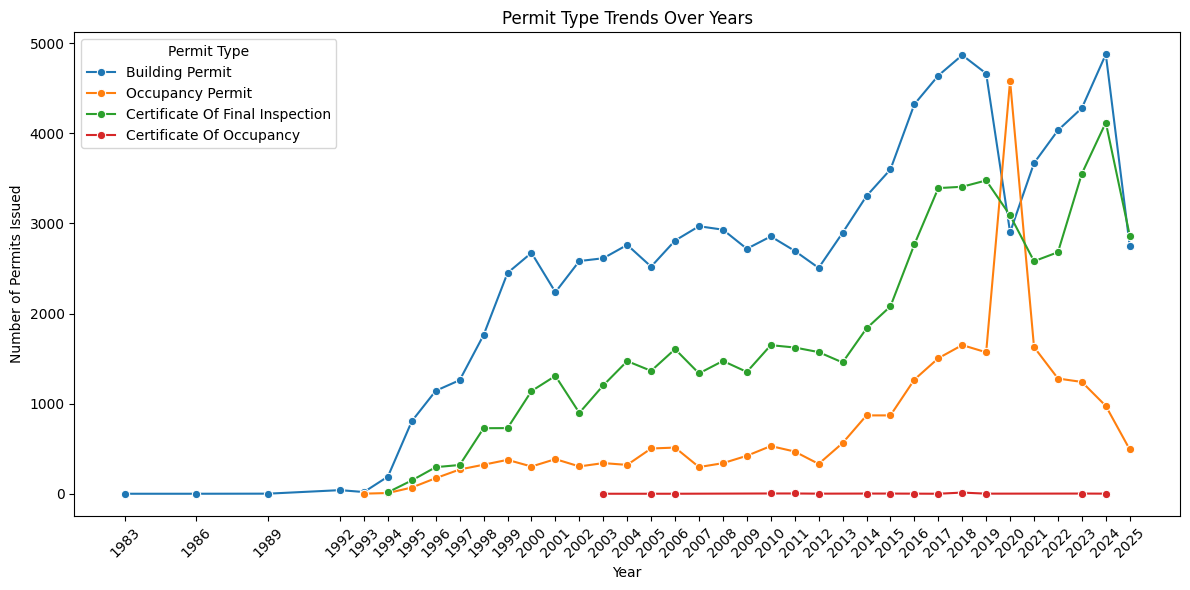

In [183]:
from datetime import datetime


# Ensure 'issue_date' is datetime
df2['issue_date'] = pd.to_datetime(df2['issue_date'], errors='coerce')

# Extract year
df2['issue_year'] = df2['issue_date'].dt.year

# Filter out future years
current_year = datetime.now().year
df2 = df2[df2['issue_year'] <= current_year]

# Aggregate by year and permit type
permit_trend_yearly = df2.groupby(['issue_year', 'permit_certificate_type']).size().reset_index(name='num_permits')

# Plot trend
plt.figure(figsize=(12,6))
sns.lineplot(data=permit_trend_yearly, x='issue_year', y='num_permits',
             hue='permit_certificate_type', marker='o')
plt.title("Permit Type Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Permits Issued")

# Make all years visible
years = sorted(df2['issue_year'].dropna().unique())
plt.xticks(years, rotation=45)

plt.legend(title='Permit Type')
plt.tight_layout()
plt.show()


## Forecasting Permit Counts

### Simple linear regression forecast of permit counts for the next 5 years

#### Insights:

* Trend indicates whether building activity is increasing or decreasing.
* Useful for city planners or construction businesses.

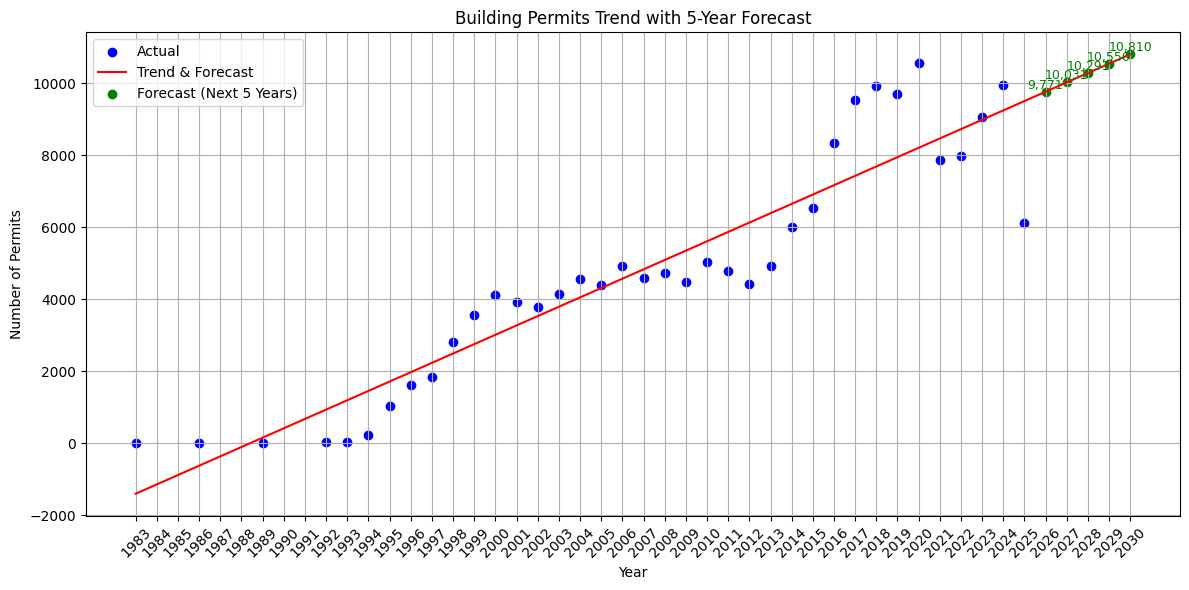

In [184]:
# Make sure 'issue_date' is datetime
df2['issue_date'] = pd.to_datetime(df2['issue_date'], errors='coerce')

# Create a year column
df2['issue_year'] = df2['issue_date'].dt.year

# Now group by year
permits_yearly = df2.groupby('issue_year').size().reset_index(name='num_permits')

# Prepare X and y
X = permits_yearly['issue_year'].values.reshape(-1, 1)
y = permits_yearly['num_permits'].values

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict trend line for existing data
y_pred = model.predict(X)

# Forecast next 5 years
future_years = np.arange(X.max()+1, X.max()+6).reshape(-1, 1)
future_pred = model.predict(future_years)

# Combine actual and future for plotting
all_years = np.vstack([X, future_years])
all_pred = np.hstack([y_pred, future_pred])

# Plot
plt.figure(figsize=(12,6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(all_years, all_pred, color='red', label='Trend & Forecast')
plt.scatter(future_years, future_pred, color='green', label='Forecast (Next 5 Years)')

# Add data labels for forecast points
for year, pred in zip(future_years.flatten(), future_pred):
    plt.text(year, pred, f'{int(pred):,}', color='green', fontsize=9, ha='center', va='bottom')

# Set x-axis ticks for all years
plt.xticks(np.arange(X.min(), future_years.max()+1, 1), rotation=45)

plt.xlabel('Year')
plt.ylabel('Number of Permits')
plt.title('Building Permits Trend with 5-Year Forecast')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()